<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/ClusteringTendencyQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler

def hopkins_statistic(X, n):
    """
    Calculate the Hopkins statistic for assessing the clustering tendency of a dataset.

    Parameters:
    - X: Input dataset
    - n: Number of samples to randomly select

    Returns:
    - Hopkins statistic value
    """
    d = X.shape[1]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Randomly sample n data points
    rand_ind = np.random.choice(X_scaled.shape[0], n, replace=False)

    # Calculate nearest neighbor distances for random sample
    dist_rand = distance.cdist(X_scaled[rand_ind], X_scaled, 'euclidean')
    u = np.mean(dist_rand, axis=0)

    # Calculate nearest neighbor distances for entire dataset
    dist_X = distance.pdist(X_scaled, 'euclidean')
    v = np.mean(dist_X)

    return np.sum(u) / (np.sum(u) + v)

def plot_elbow_method(X):
    """
    Plot the within-cluster sum of squares (WCSS) against the number of clusters.

    Parameters:
    - X: Input dataset
    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, max_iter=300, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

def visualize_clusters(X, labels):
    """
    Visualize clusters using 2D scatter plot.

    Parameters:
    - X: Input dataset
    - labels: Cluster labels
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title('Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()




Run elbow method on the synthetic data and see where the rate of decrease in within-cluster sum of squares (WCSS)  starts to slow down.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

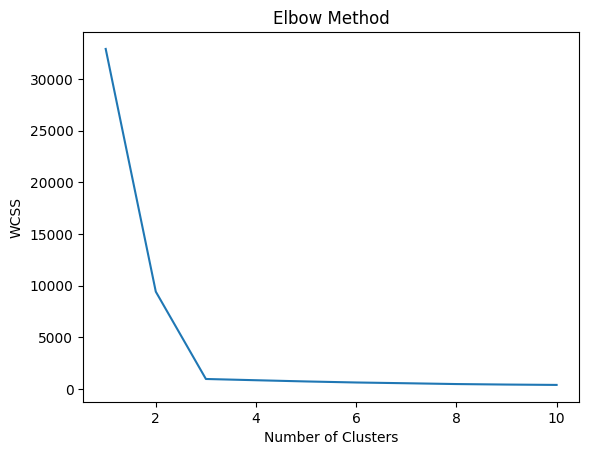

In [40]:
# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)
# Plot the elbow method for synthetic data
plot_elbow_method(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


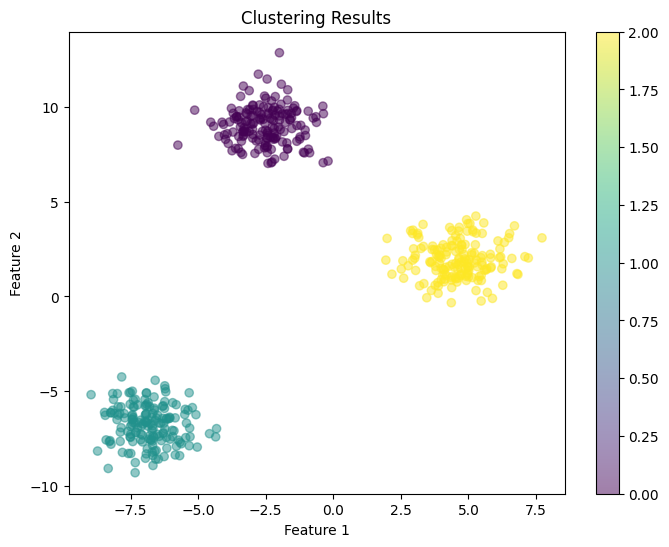

Hopkins Statistic Value: 0.998001782783548
Silhouette Coefficient: 0.8437565906781406


In [54]:
# Calculate Hopkins statistic
hopkins_value = hopkins_statistic(X, 100)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate Silhouette coefficient
silhouette_avg = silhouette_score(X, labels)

# Visualize clusters
visualize_clusters(X, labels)

# Print results
print(f'Hopkins Statistic Value: {hopkins_value}')
print(f'Silhouette Coefficient: {silhouette_avg}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

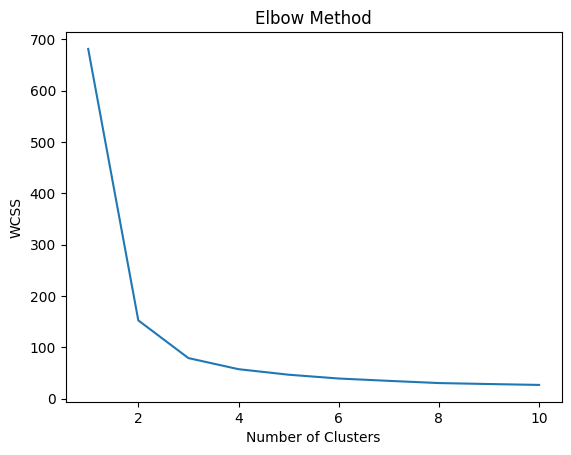

In [42]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X_iris = iris.data

# Plot the elbow method for Iris dataset
plot_elbow_method(X_iris)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


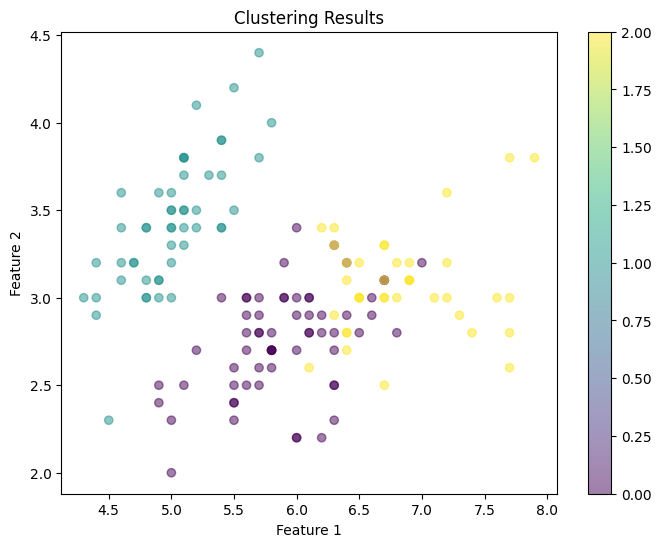

Iris Dataset:
Hopkins Statistic Value: 0.9933359316021806
Silhouette Coefficient: 0.5528190123564095
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [55]:


# Calculate Hopkins statistic for Iris dataset
hopkins_value_iris = hopkins_statistic(X_iris, 100)

# Perform KMeans clustering on Iris dataset
kmeans_iris = KMeans(n_clusters=3, random_state=42)
labels_iris = kmeans_iris.fit_predict(X_iris)

# Calculate Silhouette coefficient for Iris dataset
silhouette_avg_iris = silhouette_score(X_iris, labels_iris)

# Visualize clusters for Iris dataset
visualize_clusters(X_iris[:, :2], labels_iris)  # Considering only first two features for visualization

# Print results for Iris dataset
print("Iris Dataset:")
print(f'Hopkins Statistic Value: {hopkins_value_iris}')
print(f'Silhouette Coefficient: {silhouette_avg_iris}')
print(labels_iris)

Exercise: Please read the diabetes data set and perform elbow method on it. Then calculate Hopkins statistics and Silhouette Coefficient

In [44]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/DATA/diabetes_train.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

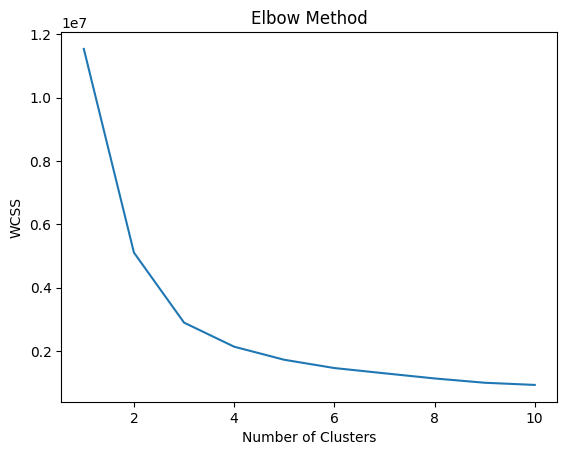

In [45]:
plot_elbow_method(data.iloc[:, 0:8])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


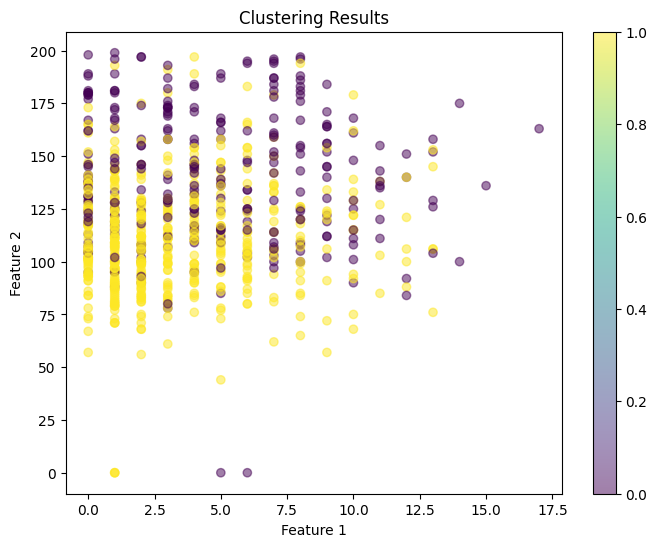

Iris Dataset:
Hopkins Statistic Value: 0.9987044068530866
Silhouette Coefficient: 0.5679958534891544


In [56]:
# Calculate Hopkins statistic for Iris dataset
hopkins_value_diabetes = hopkins_statistic(data.iloc[:, 0:8], 100)

# Perform KMeans clustering on Iris dataset
kmeans_diabetes = KMeans(n_clusters=2, random_state=42)
labels_diabetes = kmeans_diabetes.fit_predict(data.iloc[:, 0:8])

# Calculate Silhouette coefficient for Iris dataset
silhouette_avg_diabetes = silhouette_score(data.iloc[:, 0:8], labels_diabetes)

# Visualize clusters for Iris dataset
visualize_clusters(data.iloc[:, :2].to_numpy(), data['class'].replace({'tested_positive': 0, 'tested_negative': 1}))  # Considering only first two features for visualization

# Print results for Iris dataset
print("Iris Dataset:")
print(f'Hopkins Statistic Value: {hopkins_value_diabetes }')
print(f'Silhouette Coefficient: {silhouette_avg_diabetes}')

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()

data_std = scaler.fit_transform(data.iloc[:, 0:8])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)
principal_components.shape

(758, 2)

In [49]:
# Create a DataFrame for visualization
data_pca = np.column_stack((principal_components, data.iloc[:,8]))
columns = ['Principal Component 1', 'Principal Component 2', 'Target']
df = pd.DataFrame(data_pca, columns=columns)
df.head()

,Principal Component 1,Principal Component 2,Target
0,1.046601,1.268584,tested_positive
1,-1.110077,-0.746869,tested_negative
2,-0.420747,1.600077,tested_positive
3,-1.097527,-1.293436,tested_negative
4,2.396075,-2.083513,tested_positive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

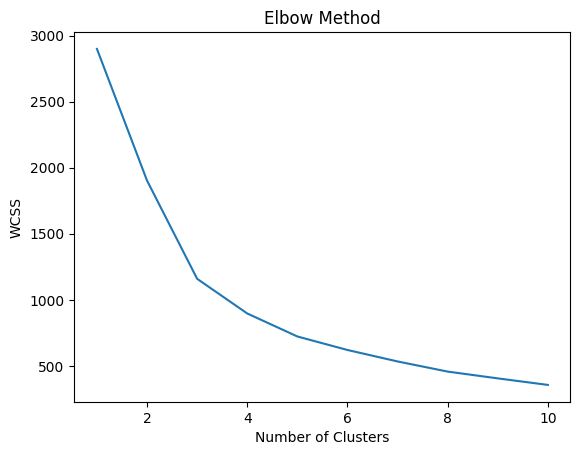

In [50]:
plot_elbow_method(data_pca[:, 0:2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


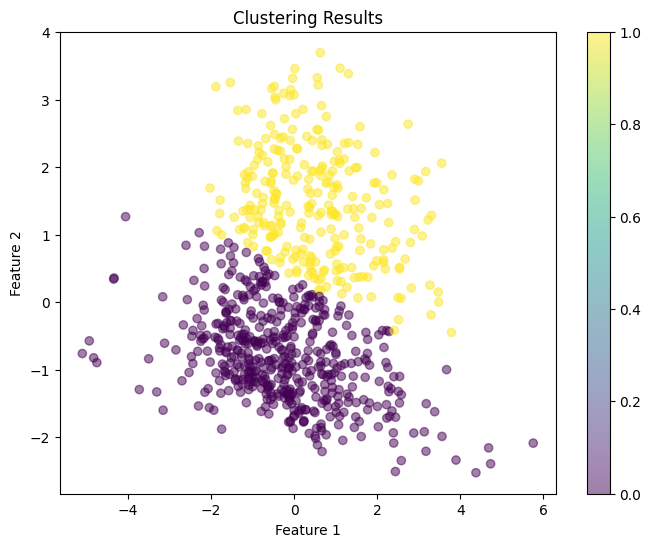

Iris Dataset:
Hopkins Statistic Value: 0.9986653441953515
Silhouette Coefficient: 0.3662400588262644
[1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1

In [57]:
# Calculate Hopkins statistic for Iris dataset
hopkins_value_diabetes = hopkins_statistic(data_pca[:, :2], 100)

# Perform KMeans clustering on Iris dataset
kmeans_diabetes = KMeans(n_clusters=2, random_state=42)
labels_diabetes = kmeans_diabetes.fit_predict(data_pca[:, :2])

# Calculate Silhouette coefficient for Iris dataset
silhouette_avg_diabetes = silhouette_score(data_pca[:, :2], labels_diabetes)

# Visualize clusters for Iris dataset
#visualize_clusters(data_pca[:, :2], data['class'].replace({'tested_positive': 0, 'tested_negative': 1}))  # Considering only first two features for visualization
visualize_clusters(data_pca[:, :2], labels_diabetes )  # Considering only first two features for visualization


# Print results for Iris dataset
print("Iris Dataset:")
print(f'Hopkins Statistic Value: {hopkins_value_diabetes }')
print(f'Silhouette Coefficient: {silhouette_avg_diabetes}')
print(labels_diabetes)